# Lecture 06

In [1]:
from sklearn.datasets import load_digits, load_iris, load_wine, load_boston, load_breast_cancer

In [2]:
!pip install scikit-learn==1.0.1

In [3]:
load_func = load_wine
data = load_func(as_frame=True)
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [4]:
print(data['DESCR'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [5]:
df = data['frame']
display(df.info(), df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

None

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
df['target'].value_counts(dropna=False)

1    71
0    59
2    48
Name: target, dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

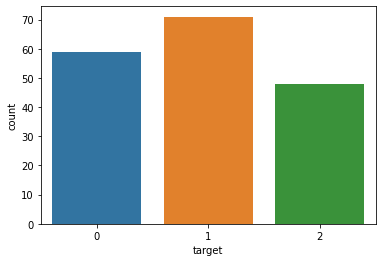

In [8]:
sns.countplot(data=df, x='target')

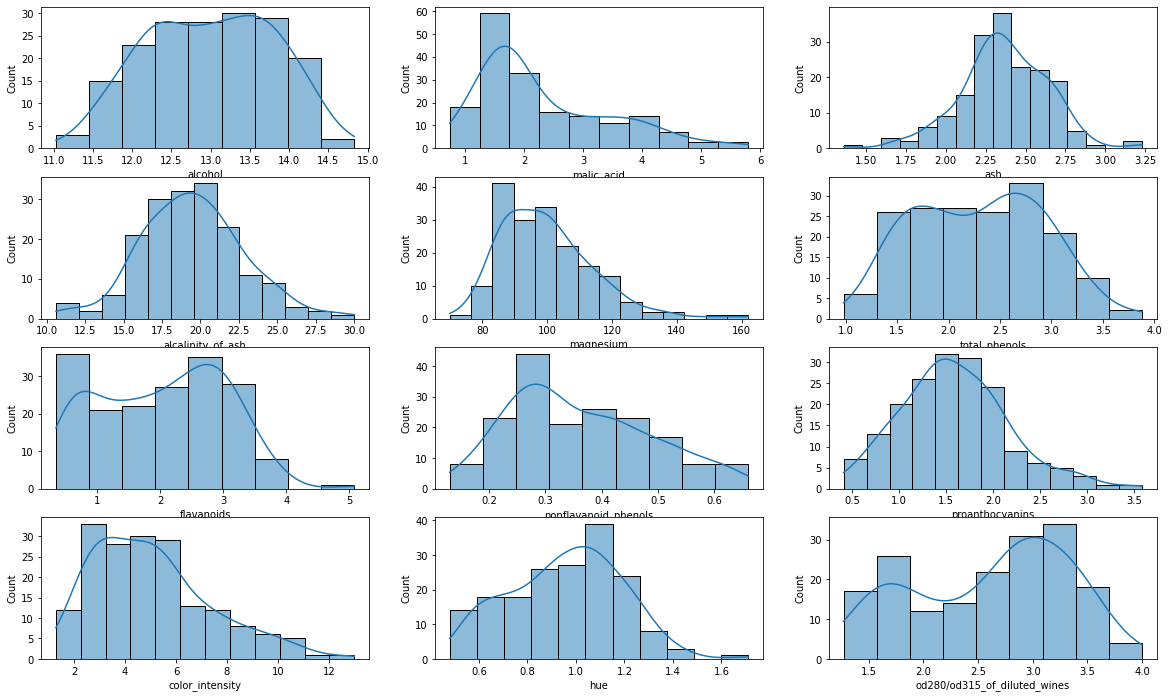

In [9]:
fig, axs = plt.subplots(4, 3, figsize=(20, 12))

for col_name, ax in zip(df.columns, axs.ravel()):
    sns.histplot(data=df, x=col_name, kde=True, ax=ax)

In [10]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [11]:
X, y = df.drop(columns='target'), df['target']
y = y.gt(0).astype(int)

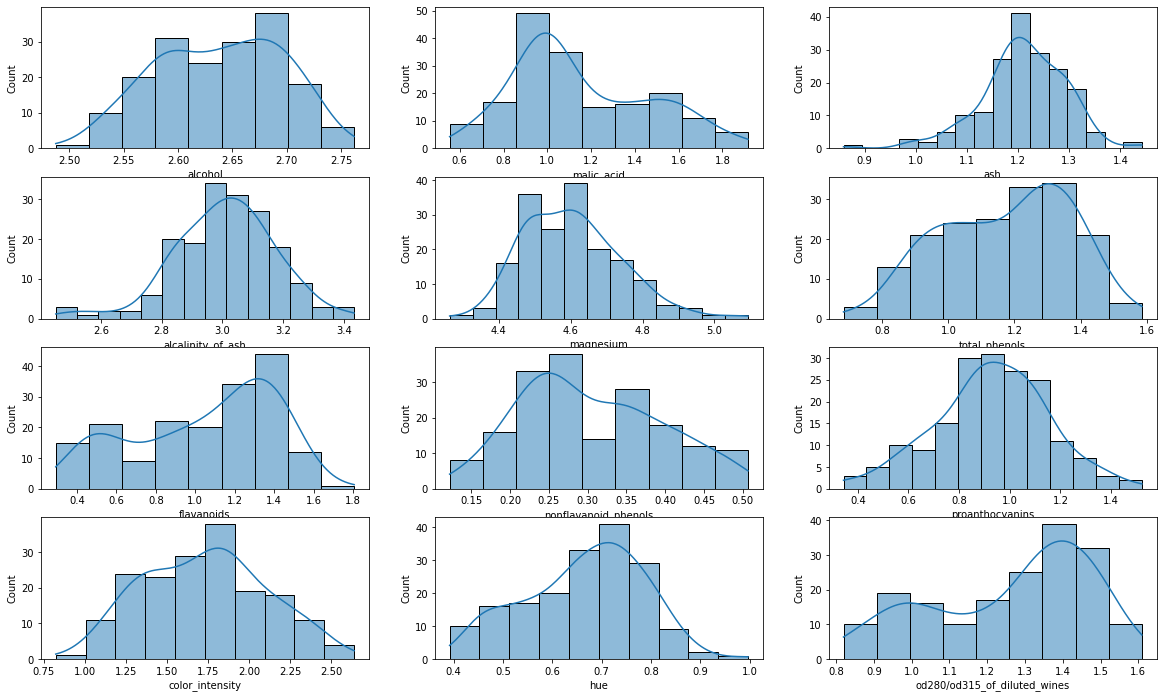

In [12]:
fig, axs = plt.subplots(4, 3, figsize=(20, 12))

for col_name, ax in zip(X.columns, axs.ravel()):
    sns.histplot(data=np.log1p(X), x=col_name, kde=True, ax=ax) # log1p np.log(x + 1) => tránh trường hợp x = 0 log -> inf
    # lấy log: nôm na: giá trị ở rất xa (left skew) -> vào gần lại

In [13]:
np.log(-10) # ~ np.log(10)*-1
-1*np.log(10)

c:\users\tram\anaconda3\envs\tramng\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


-2.302585092994046

In [14]:
np.exp(-2.3)

0.10025884372280375

In [15]:
def negative_log(x):
    return np.sign(x)*np.log(np.abs(x))

In [16]:
negative_log(-100)

-4.605170185988092

In [17]:
scaler = RobustScaler()
X_scaled = scaler.fit_transform(np.log1p(X))
X_scaled

array([[ 0.85917126, -0.12353814,  0.20060332, ...,  0.21603422,
         0.75230999,  0.6770158 ],
       [ 0.1131385 , -0.0668929 , -0.65882444, ...,  0.24423447,
         0.43348995,  0.65605412],
       [ 0.08308552,  0.35399903,  0.85858355, ...,  0.18769538,
         0.28025486,  0.8348034 ],
       ...,
       [ 0.16552808,  1.35794038, -0.29394732, ..., -1.22117851,
        -1.11231041,  0.31751803],
       [ 0.09060671,  0.50106624,  0.0289121 , ..., -1.18502202,
        -1.04618813,  0.3263384 ],
       [ 0.78898803,  1.28089744,  1.0424012 , ..., -1.14909081,
        -1.06805912, -0.27253479]])

In [18]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=420)

scaler = RobustScaler()
scaler.fit(x_train) # Tính toán các thông số về phân phối dựa trên bộ dữ liệu train

RobustScaler()

In [19]:
scaler.transform(x_test) # Scale dữ liệu test dựa trên phân phối của bộ dữ liệu train
# Cho kết quả tương đối khác với fit_transform đặc biệt trong trường hợp dữ liệu split ko đều theo phân phối

array([[ 0.136     ,  1.43356643, -0.11764706,  0.66666667, -0.63157895,
        -0.56862745, -0.26347305,  1.35      ,  0.19178082,  0.05649718,
        -0.33333333, -0.57480315, -0.32142857],
       [-0.472     , -0.13986014, -0.44117647,  0.2       ,  0.31578947,
        -1.10784314, -0.60479042,  0.15      , -0.02739726, -0.43785311,
        -0.15      , -0.72440945,  0.52380952],
       [ 0.504     , -0.00699301,  0.85294118, -0.11111111,  0.68421053,
         0.11764706,  0.2994012 , -0.25      ,  0.08219178, -0.11299435,
         0.38888889,  0.1023622 ,  1.05952381],
       [ 0.544     , -0.05594406,  0.29411765,  0.22222222,  1.        ,
         0.71568627,  0.4491018 , -0.7       ,  1.32876712,  0.46610169,
         0.05555556,  0.22834646,  1.11904762],
       [ 0.664     ,  0.03496503,  0.        , -0.64444444,  0.21052632,
         0.37254902,  0.50898204, -0.35      ,  0.28767123, -0.2259887 ,
         0.41666667,  0.99212598,  0.91666667],
       [ 1.072     ,  1.524475

In [20]:
X_scaled = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)
X_scaled

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0.859171,-0.123538,0.200603,-0.994948,1.327738,0.381901,0.458575,-0.369778,0.933410,0.289007,0.216034,0.752310,0.677016
1,0.113138,-0.066893,-0.658824,-2.446979,0.103365,0.258412,0.322426,-0.496899,-0.420396,-0.104857,0.244234,0.433490,0.656054
2,0.083086,0.353999,0.858584,-0.211677,0.154283,0.381901,0.535514,-0.244627,1.475141,0.300249,0.187695,0.280255,0.834803
3,0.956657,0.064944,0.397154,-0.665868,0.729108,1.129995,0.637123,-0.626055,0.807867,0.816171,-0.316677,0.465741,1.163374
4,0.143107,0.501066,1.374828,0.332955,0.950948,0.381901,0.289095,0.295713,0.364325,-0.125849,0.216034,0.111070,0.129074
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.489063,1.870347,0.257167,0.224561,-0.159031,-0.688781,-1.181919,1.017409,-0.794995,0.794779,-1.042621,-0.918369,0.139089
174,0.262145,1.196567,0.341401,0.743204,0.204704,-0.554472,-1.034033,0.524723,-0.215685,0.706680,-0.835403,-1.112310,0.158917
175,0.165528,1.357940,-0.293947,0.113617,1.037085,-0.793521,-1.095910,0.524723,-0.308759,1.267571,-1.221179,-1.112310,0.317518
176,0.090607,0.501066,0.028912,0.113617,1.037085,-0.723298,-1.106435,1.070341,-0.139876,1.110773,-1.185022,-1.046188,0.326338


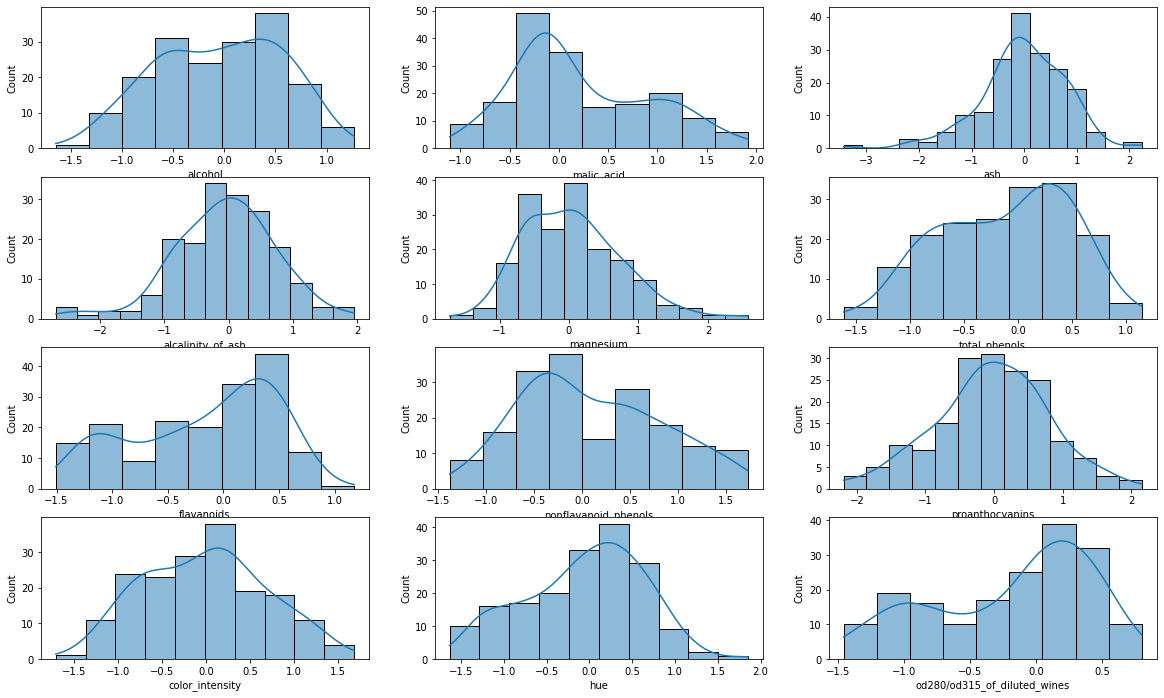

In [21]:
fig, axs = plt.subplots(4, 3, figsize=(20, 12))

for col_name, ax in zip(X_scaled.columns, axs.ravel()):
    sns.histplot(data=X_scaled, x=col_name, kde=True, ax=ax)

<AxesSubplot:xlabel='alcohol', ylabel='malic_acid'>

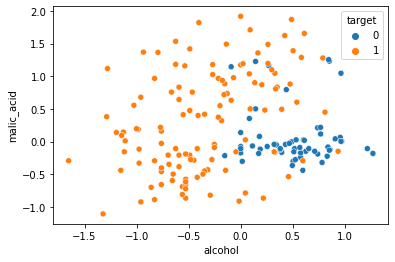

In [22]:
sns.scatterplot(data=X_scaled, x='alcohol', y='malic_acid', hue=y, palette='tab10')

![](https://scikit-learn.org/stable/_images/grid_search_workflow.png)

In [23]:
from sklearn.model_selection import train_test_split, KFold

In [24]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, train_size=0.7)
display(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(124, 13)

(54, 13)

(124,)

(54,)

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)

y_pred = tree.predict(x_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.97        15
           1       0.97      1.00      0.99        39

    accuracy                           0.98        54
   macro avg       0.99      0.97      0.98        54
weighted avg       0.98      0.98      0.98        54



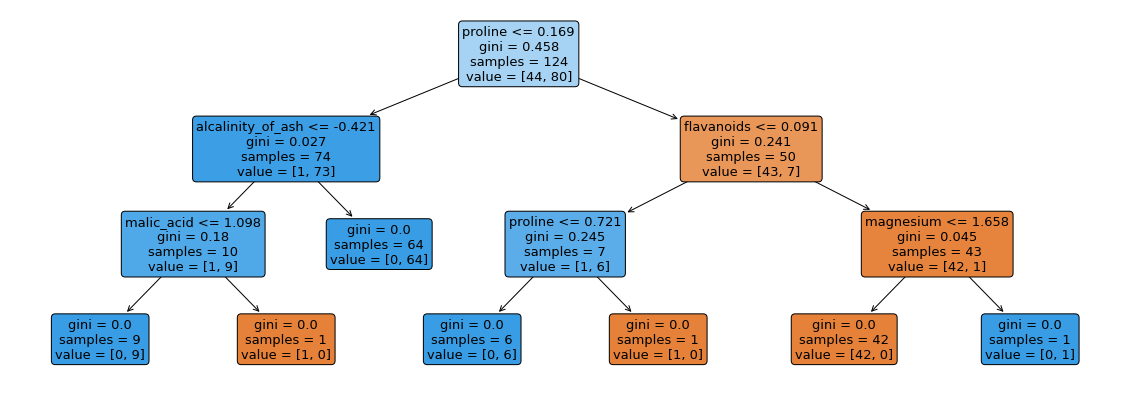

In [26]:
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(20, 7))
ax = plt.subplot()
_ = plot_tree(tree, max_depth=3, feature_names=X.columns, ax=ax, filled=True, rounded=True)

![](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

In [27]:
from sklearn.model_selection import cross_validate, cross_val_score

In [28]:
cv = KFold()

tree = DecisionTreeClassifier()
tree_scores = cross_val_score(tree, X_scaled, y, cv=cv, n_jobs=2)

In [29]:
tree_scores

array([0.80555556, 0.97222222, 0.91666667, 0.94285714, 0.97142857])

In [30]:
print(f'{tree_scores.mean()*100:.2f} accuracy with a standard deviation of {tree_scores.std()*100:.2f}')

92.17 accuracy with a standard deviation of 6.16


In [31]:
cv = KFold()

tree = DecisionTreeClassifier()
scoring = ['accuracy', 'precision', 'recall', 'f1']
tree_scores = cross_validate(tree, X_scaled, y, cv=cv, n_jobs=2, scoring=scoring)

In [32]:
tree_scores.keys()

dict_keys(['fit_time', 'score_time', 'test_accuracy', 'test_precision', 'test_recall', 'test_f1'])

In [33]:
tree_scores = pd.DataFrame(tree_scores)
tree_scores

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
0,0.004997,0.015990,0.833333,0.000000,0.000000,0.000000
1,0.004997,0.009995,0.972222,0.928571,1.000000,0.962963
2,0.004996,0.008995,0.916667,1.000000,0.916667,0.956522
3,0.004997,0.009993,0.942857,1.000000,0.942857,0.970588
4,0.003997,0.005996,0.971429,1.000000,0.971429,0.985507


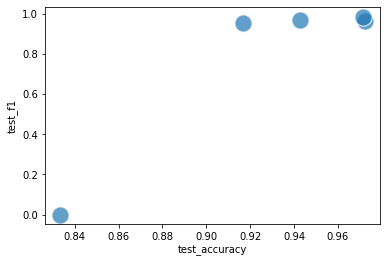

In [34]:
ax = sns.scatterplot(data=tree_scores, x='test_accuracy', y='test_f1', s=300, alpha=0.7)

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
cv = KFold()

forest = RandomForestClassifier()
forest_scores = cross_validate(forest, X_scaled, y, cv=cv, n_jobs=2, scoring=scoring)

In [37]:
forest_scores = pd.DataFrame(forest_scores)
forest_scores

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
0,0.180890,0.018987,0.888889,0.000000,0.000000,0.000000
1,0.176893,0.020986,0.972222,0.928571,1.000000,0.962963
2,0.220865,0.019988,0.944444,1.000000,0.944444,0.971429
3,0.222863,0.020987,1.000000,1.000000,1.000000,1.000000
4,0.158897,0.016989,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:xlabel='test_accuracy', ylabel='test_f1'>

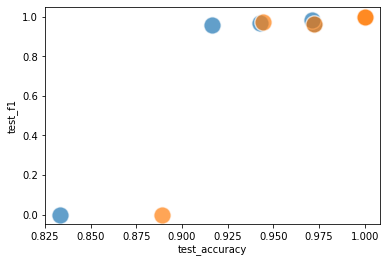

In [38]:
sns.scatterplot(data=tree_scores, x='test_accuracy', y='test_f1', s=300, alpha=0.7)
sns.scatterplot(data=forest_scores, x='test_accuracy', y='test_f1', s=300, alpha=0.7)

In [39]:
from sklearn.model_selection import GridSearchCV

In [40]:
param_grid = {
    'max_features': [2, 4, 5],
    'max_depth': [3, 5, 7, 10]
}

forest = RandomForestClassifier()
gs = GridSearchCV(forest, param_grid, scoring=scoring, cv=cv, n_jobs=2, verbose=5, refit=False)
gs_result = gs.fit(X_scaled, y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [41]:
gs_result

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(), n_jobs=2,
             param_grid={'max_depth': [3, 5, 7, 10], 'max_features': [2, 4, 5]},
             refit=False, scoring=['accuracy', 'precision', 'recall', 'f1'],
             verbose=5)

In [42]:
gs_result.cv_results_

{'mean_fit_time': array([0.19407949, 0.1906817 , 0.23365622, 0.18248892, 0.21087012,
        0.19587555, 0.19168344, 0.18188844, 0.20007815, 0.19347897,
        0.19528084, 0.21127043]),
 'std_fit_time': array([0.00918964, 0.00927582, 0.03383404, 0.0138569 , 0.00536374,
        0.00934583, 0.01889223, 0.00485445, 0.02398799, 0.00360902,
        0.01957028, 0.02226157]),
 'mean_score_time': array([0.0265841 , 0.02418542, 0.02218657, 0.02058668, 0.02538395,
        0.02058764, 0.02198596, 0.02098641, 0.02098613, 0.02778249,
        0.02238579, 0.02018709]),
 'std_score_time': array([0.00349642, 0.00798043, 0.00318429, 0.0021538 , 0.00215172,
        0.00135682, 0.00334352, 0.00178747, 0.00260563, 0.00548895,
        0.00215311, 0.00159848]),
 'param_max_depth': masked_array(data=[3, 3, 3, 5, 5, 5, 7, 7, 7, 10, 10, 10],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False],
        fill_value='?',
             dtype=obj

In [43]:
gs_result_df = pd.DataFrame(gs_result.cv_results_)
gs_result_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,params,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,...,std_test_recall,rank_test_recall,split0_test_f1,split1_test_f1,split2_test_f1,split3_test_f1,split4_test_f1,mean_test_f1,std_test_f1,rank_test_f1
0,0.194079,0.009190,0.026584,0.003496,3,2,"{'max_depth': 3, 'max_features': 2}",0.805556,0.972222,0.944444,...,0.395031,6,0.0,0.962963,0.971429,1.0,1.0,0.786878,0.393722,6
1,0.190682,0.009276,0.024185,0.007980,3,4,"{'max_depth': 3, 'max_features': 4}",0.888889,0.972222,0.944444,...,0.395031,6,0.0,0.962963,0.971429,1.0,1.0,0.786878,0.393722,6
2,0.233656,0.033834,0.022187,0.003184,3,5,"{'max_depth': 3, 'max_features': 5}",0.861111,0.972222,0.944444,...,0.395031,6,0.0,0.962963,0.971429,1.0,1.0,0.786878,0.393722,6
3,0.182489,0.013857,0.020587,0.002154,5,2,"{'max_depth': 5, 'max_features': 2}",0.861111,0.972222,0.972222,...,0.397368,1,0.0,0.962963,0.985915,1.0,1.0,0.789776,0.395120,1
4,0.210870,0.005364,0.025384,0.002152,5,4,"{'max_depth': 5, 'max_features': 4}",0.888889,0.972222,0.972222,...,0.397368,1,0.0,0.962963,0.985915,1.0,1.0,0.789776,0.395120,1
5,0.195876,0.009346,0.020588,0.001357,5,5,"{'max_depth': 5, 'max_features': 5}",0.888889,0.972222,0.944444,...,0.395031,6,0.0,0.962963,0.971429,1.0,1.0,0.786878,0.393722,6
6,0.191683,0.018892,0.021986,0.003344,7,2,"{'max_depth': 7, 'max_features': 2}",0.888889,0.972222,0.972222,...,0.397368,1,0.0,0.962963,0.985915,1.0,1.0,0.789776,0.395120,1
7,0.181888,0.004854,0.020986,0.001787,7,4,"{'max_depth': 7, 'max_features': 4}",0.888889,0.972222,0.944444,...,0.395031,6,0.0,0.962963,0.971429,1.0,1.0,0.786878,0.393722,6
8,0.200078,0.023988,0.020986,0.002606,7,5,"{'max_depth': 7, 'max_features': 5}",0.888889,0.972222,0.916667,...,0.392994,12,0.0,0.962963,0.956522,1.0,1.0,0.783897,0.392367,12
9,0.193479,0.003609,0.027782,0.005489,10,2,"{'max_depth': 10, 'max_features': 2}",0.861111,0.972222,0.972222,...,0.397368,1,0.0,0.962963,0.985915,1.0,1.0,0.789776,0.395120,1


In [44]:
params = gs_result_df['params'].apply(pd.Series)
params

,max_depth,max_features
0,3,2
1,3,4
2,3,5
3,5,2
4,5,4
5,5,5
6,7,2
7,7,4
8,7,5
9,10,2


In [45]:
gs_result_df = gs_result_df.join(params)
gs_result_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,params,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,...,split0_test_f1,split1_test_f1,split2_test_f1,split3_test_f1,split4_test_f1,mean_test_f1,std_test_f1,rank_test_f1,max_depth,max_features
0,0.194079,0.009190,0.026584,0.003496,3,2,"{'max_depth': 3, 'max_features': 2}",0.805556,0.972222,0.944444,...,0.0,0.962963,0.971429,1.0,1.0,0.786878,0.393722,6,3,2
1,0.190682,0.009276,0.024185,0.007980,3,4,"{'max_depth': 3, 'max_features': 4}",0.888889,0.972222,0.944444,...,0.0,0.962963,0.971429,1.0,1.0,0.786878,0.393722,6,3,4
2,0.233656,0.033834,0.022187,0.003184,3,5,"{'max_depth': 3, 'max_features': 5}",0.861111,0.972222,0.944444,...,0.0,0.962963,0.971429,1.0,1.0,0.786878,0.393722,6,3,5
3,0.182489,0.013857,0.020587,0.002154,5,2,"{'max_depth': 5, 'max_features': 2}",0.861111,0.972222,0.972222,...,0.0,0.962963,0.985915,1.0,1.0,0.789776,0.395120,1,5,2
4,0.210870,0.005364,0.025384,0.002152,5,4,"{'max_depth': 5, 'max_features': 4}",0.888889,0.972222,0.972222,...,0.0,0.962963,0.985915,1.0,1.0,0.789776,0.395120,1,5,4
5,0.195876,0.009346,0.020588,0.001357,5,5,"{'max_depth': 5, 'max_features': 5}",0.888889,0.972222,0.944444,...,0.0,0.962963,0.971429,1.0,1.0,0.786878,0.393722,6,5,5
6,0.191683,0.018892,0.021986,0.003344,7,2,"{'max_depth': 7, 'max_features': 2}",0.888889,0.972222,0.972222,...,0.0,0.962963,0.985915,1.0,1.0,0.789776,0.395120,1,7,2
7,0.181888,0.004854,0.020986,0.001787,7,4,"{'max_depth': 7, 'max_features': 4}",0.888889,0.972222,0.944444,...,0.0,0.962963,0.971429,1.0,1.0,0.786878,0.393722,6,7,4
8,0.200078,0.023988,0.020986,0.002606,7,5,"{'max_depth': 7, 'max_features': 5}",0.888889,0.972222,0.916667,...,0.0,0.962963,0.956522,1.0,1.0,0.783897,0.392367,12,7,5
9,0.193479,0.003609,0.027782,0.005489,10,2,"{'max_depth': 10, 'max_features': 2}",0.861111,0.972222,0.972222,...,0.0,0.962963,0.985915,1.0,1.0,0.789776,0.395120,1,10,2


In [46]:
mean_cols = [i for i in gs_result_df.columns if i.startswith('mean')]
rank_cols = [i for i in gs_result_df.columns if i.startswith('rank')]
gs_result_df[['max_features', 'max_depth', *mean_cols, *rank_cols]]

,max_features,max_depth,mean_fit_time,mean_score_time,mean_test_accuracy,mean_test_precision,mean_test_recall,mean_test_f1,rank_test_accuracy,rank_test_precision,rank_test_recall,rank_test_f1
0,2,3,0.194079,0.026584,0.944444,0.785714,0.788889,0.786878,12,1,6,6
1,4,3,0.190682,0.024185,0.961111,0.785714,0.788889,0.786878,4,1,6,6
2,5,3,0.233656,0.022187,0.955556,0.785714,0.788889,0.786878,10,1,6,6
3,2,5,0.182489,0.020587,0.961111,0.785714,0.794444,0.789776,4,1,1,1
4,4,5,0.210870,0.025384,0.966667,0.785714,0.794444,0.789776,1,1,1,1
5,5,5,0.195876,0.020588,0.961111,0.785714,0.788889,0.786878,4,1,6,6
6,2,7,0.191683,0.021986,0.966667,0.785714,0.794444,0.789776,1,1,1,1
7,4,7,0.181888,0.020986,0.961111,0.785714,0.788889,0.786878,4,1,6,6
8,5,7,0.200078,0.020986,0.955556,0.785714,0.783333,0.783897,10,1,12,12
9,2,10,0.193479,0.027782,0.961111,0.785714,0.794444,0.789776,4,1,1,1
